In [1]:
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('VN_housing_dataset.csv')
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


CLEAN DATA AND REMOVE OUTLIER

In [3]:
df_cleaned = df.rename(columns = {'Ngày': 'Date', "Địa chỉ":"address", "Quận":"district", 
                                "Huyện":"ward", "Loại hình nhà ở":"house_type",
                                "Giấy tờ pháp lý":"legal_paper", "Số tầng":"floors",
                                "Số phòng ngủ":"bedrooms", "Diện tích":"Area(m2)",
                                "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"Price/m2"})
df_cleaned = df_cleaned.drop("Unnamed: 0", axis = 1)
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()


Clean columns and convert numerical columns to float type

In [4]:
columns_to_clean = ['district', 'ward','floors','bedrooms','Area(m2)','length_meter','width_meter']

for col in columns_to_clean:
    df_cleaned[col] = df_cleaned[col].str.replace('Quận', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('Phường', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('phòng', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m²', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.strip()  # Xóa khoảng trắng thừa
df_cleaned.info()


    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11473 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         11473 non-null  int64 
 1   Date          11473 non-null  object
 2   address       11473 non-null  object
 3   district      11473 non-null  object
 4   ward          11473 non-null  object
 5   house_type    11473 non-null  object
 6   legal_paper   11473 non-null  object
 7   floors        11473 non-null  object
 8   bedrooms      11473 non-null  object
 9   Area(m2)      11473 non-null  object
 10  length_meter  11473 non-null  object
 11  width_meter   11473 non-null  object
 12  Price/m2      11473 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_cleaned = df_cleaned[df_cleaned['floors'] != 'Nhiều hơn 10']
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 'nhiều hơn 10']

In [6]:
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001


In [7]:
for col in ['floors','bedrooms','Area(m2)','length_meter','width_meter','Price/m2' ]:
    df_cleaned[col] = df_cleaned[col].astype('float')
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11313 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         11313 non-null  int64  
 1   Date          11313 non-null  object 
 2   address       11313 non-null  object 
 3   district      11313 non-null  object 
 4   ward          11313 non-null  object 
 5   house_type    11313 non-null  object 
 6   legal_paper   11313 non-null  object 
 7   floors        11313 non-null  float64
 8   bedrooms      11313 non-null  float64
 9   Area(m2)      11313 non-null  float64
 10  length_meter  11313 non-null  float64
 11  width_meter   11313 non-null  float64
 12  Price/m2      11313 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


Create dummies for categorical columns

In [8]:
dummy_house_type = pd.get_dummies(df_cleaned.house_type, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(df_cleaned.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(df_cleaned.district, prefix="district")
dummy_ward = pd.get_dummies(df_cleaned.ward, prefix="ward")

df_housing = pd.concat([df_cleaned, dummy_house_type, dummy_legal_paper, dummy_district, dummy_ward], axis=1).drop(['index', 'Date', 'address', 'district', 'ward', 'house_type', 'legal_paper'], axis = 1)

df_housing = df_housing.replace({False: 0, True: 1})
df_housing.head()


C:\Users\AD\AppData\Local\Temp\ipykernel_16416\1239060138.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_housing = df_housing.replace({False: 0, True: 1})


,floors,bedrooms,Area(m2),length_meter,width_meter,Price/m2,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,5.0,90.0,18.0,5.0,108.89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Removing outliers using IQR method


In [9]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]
    return df_out

In [10]:
removed_outliers = df_housing
columns_to_remove_outliers = ['floors', 'bedrooms', 'Area(m2)', 'length_meter',
                            'width_meter', 'Price/m2']
for col in columns_to_remove_outliers:
    removed_outliers = remove_outlier(removed_outliers, col)

In [11]:
len(removed_outliers)

7325

In [12]:
df_final = removed_outliers
df_final

,floors,bedrooms,Area(m2),length_meter,width_meter,Price/m2,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4.0,43.0,11.0,4.0,50.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,4.0,4.0,50.0,13.0,3.0,150.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11461,3.0,4.0,50.0,12.5,4.0,118.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11463,4.0,3.0,42.0,12.0,3.0,83.33,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
11464,4.0,4.0,73.0,14.0,5.0,72.60,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7325 entries, 0 to 11466
Columns: 281 entries, floors to ward_Đức Thắng
dtypes: float64(6), int64(275)
memory usage: 15.8 MB


In [14]:
df_col = df_final.columns.tolist()


SCALE DATA AND BUILD MODEL

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [16]:
X = df_final.drop(columns = 'Price/m2').values
y = df_final['Price/m2'].values


In [17]:
scaler = StandardScaler()

In [18]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = df_final.drop(['Price/m2'],axis=1), df_final['Price/m2']
X_train = scaler.fit_transform(X_train)


In [19]:
X_test, y_test = df_final.drop(['Price/m2'],axis=1), df_final['Price/m2']
X_test = scaler.transform(X_test)

Evaluate the Optimal model between LinearRegression vs RandomForestRegressor 

In [20]:
from sklearn.model_selection import cross_val_score, KFold

C:\Users\AD\AppData\Local\Temp\ipykernel_16416\3336090794.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


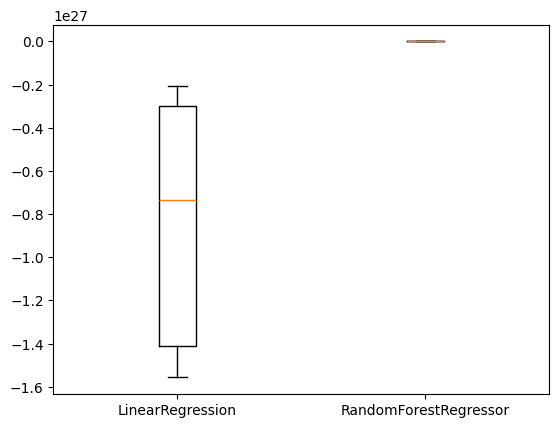

In [21]:
models = {"LinearRegression": LinearRegression(), "RandomForestRegressor": RandomForestRegressor()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{}  Accuracy: {}".format(name, test_score))

LinearRegression  Accuracy: 0.45728392634057313
RandomForestRegressor  Accuracy: 0.9139859401160686


=> THE OPTIMAL MODEL WOULD BE RandomForestRegressor

Try LinearRegression

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg_pred=reg.predict(X_test)

In [46]:
#CHECK ACCURACY
score = r2_score(y_test, reg_pred)
print("The accuracy of the LinearRegression model is {}%".format(round(score, 2) *100))

The accuracy of the LinearRegression model is 46.0%


Try Model RandomForestRegressor

In [45]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)


In [43]:
#CHECK ACCURACY
score = r2_score(y_test, predictions)
print("The accuracy of the RandomForestRegressor model is {}%".format(round(score, 2) *100))

The accuracy of the RandomForestRegressor model is 91.0%


VISUALIZE

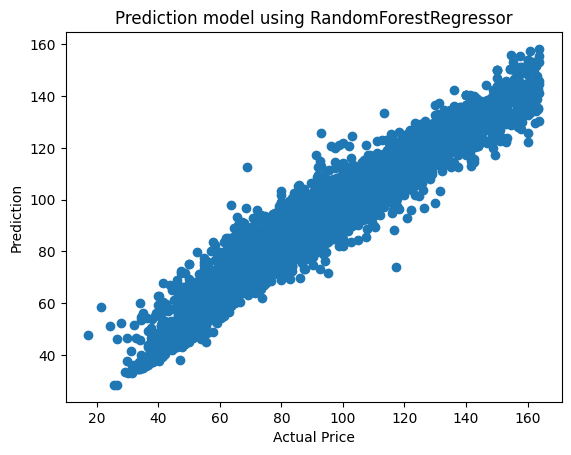

In [37]:
plt.scatter(y_train,predictions) 
plt.xlabel("Actual Price")
plt.ylabel("Prediction")
plt.title("Prediction model using RandomForestRegressor")
plt.show()


=> The model predctions is very close to the actual price

Import joblib to save scaler and the optimal model for streamlit

In [27]:
import joblib as jb

In [28]:
jb.dump(forest ,"model.pkl")

['model.pkl']

In [29]:
jb.dump(scaler, "scaler.pkl")

['scaler.pkl']